In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
print(df.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [9]:
print(df.Seller_Type.value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [10]:
print(df.Transmission.value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [11]:
#encoding
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [12]:
df.sample(8)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
138,Honda CB Hornet 160R,2016,0.60,0.87,15000,0,1,0,0
24,wagon r,2013,2.90,4.41,56879,0,0,0,0
209,grand i10,2015,4.85,5.70,21125,1,0,0,0
229,i20,2012,3.10,6.79,52132,1,0,0,0
167,TVS Apache RTR 160,2014,0.42,0.81,42000,0,1,0,0
244,verna,2013,5.95,9.40,49000,1,0,0,0
125,Royal Enfield Classic 500,2009,0.90,1.75,40000,0,1,0,0
267,city,2016,8.35,9.40,19434,1,0,0,0


In [13]:
x = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

In [14]:
#splitting training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 2)

In [15]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [16]:
y_pred = lr.predict(x_test)

In [17]:
error_score = metrics.r2_score(y_test,y_pred)

In [18]:
print(error_score)

0.8365766715026905


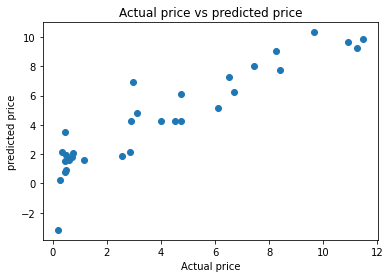

In [19]:
# visualize actual price vs predicted price
plt.scatter(y_test, y_pred)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("Actual price vs predicted price")
plt.show()

In [20]:
lasso = Lasso()
lasso.fit(x_train, y_train)

Lasso()

In [21]:
y_pred = lasso.predict(x_test)

In [22]:
error_score = metrics.r2_score(y_test,y_pred)

In [23]:
print(error_score)

0.8709167941173195


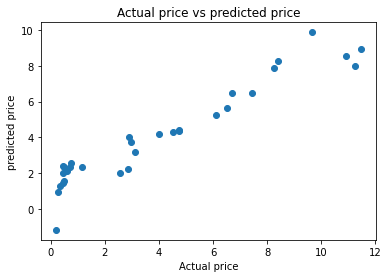

In [24]:
# visualize actual price vs predicted price
plt.scatter(y_test, y_pred)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("Actual price vs predicted price")
plt.show()